In [1]:
import matplotlib.pylab as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np
import re

array = []

try:
    file = open('./kzT57TSK.txt', 'r')
except:
    print('file reading error')
else:
    for s in file.read().splitlines():
        array.append(float(re.findall('\d+\.\d+', s)[-1]))
finally:
    file.close()

In [2]:
ping_array = np.array(array)
del array

In [3]:
mu = ping_array.mean()      #среднее
sigma = ping_array.std()    #стандартное отклонение sqrt(mean((x-x0)^2))

mu, sigma

(43.6713567839196, 3.020421892781483)

Среднее значение пинга и его стандартное отклонение.

Предполагаем, что пинг распределен нормально (у ФРТК был маленький кусочек теорвера, другого не знаем).

In [4]:
x = np.linspace(ping_array.min(), ping_array.max(), 100)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


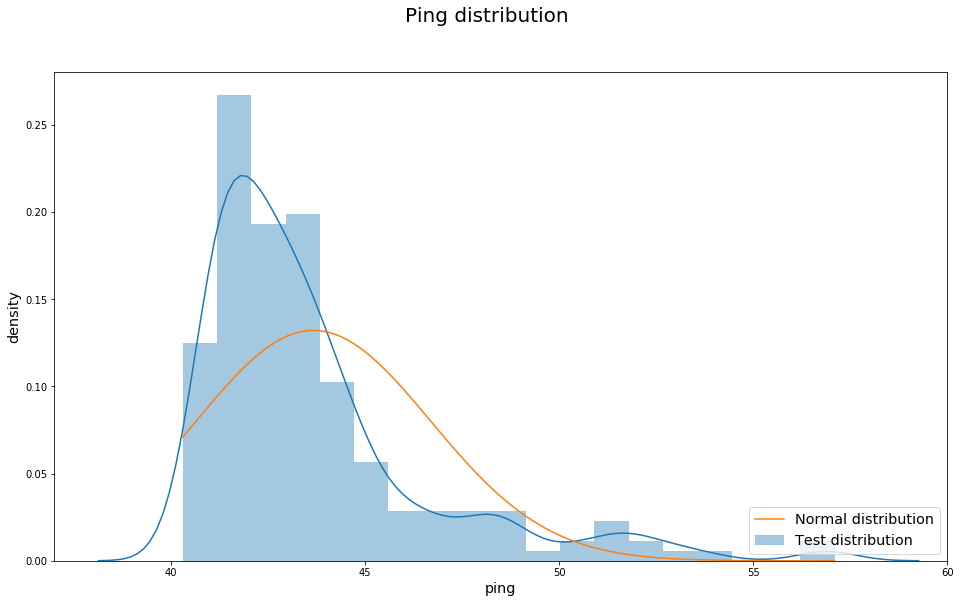

In [5]:
fig = plt.figure(figsize=(16,9))
fig.suptitle('Ping distribution', fontsize=20)
sns.distplot(ping_array, label='Test distribution', kde=True, norm_hist=True)
plt.plot(x, norm.pdf(x, mu, sigma), label = 'Normal distribution')
plt.legend(loc='lower right', fontsize = 'x-large')
plt.xlabel('ping', fontsize = 'x-large')
plt.ylabel('density', fontsize = 'x-large')
plt.xlim(37, 60)
plt.show()

Строим собственно само распределение, его аппроксимацию, и нормальное распределение. Ну, почти.